# 4. Logistic Regression

### 공부 시간에 따른 자격증 시험 합격 가능성

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("LogisticRegressionData.csv")
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

### 데이터 분리

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 학습 (Logistic Regression Model)

In [4]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train) # 학습

LogisticRegression()

### 6시간 공부했을 때 예측

In [10]:
classifier.predict([[6]])

array([1])

In [11]:
classifier.predict_proba([[6]]) # probability of pass
# [probability of fail, probability of pass]

array([[0.14150735, 0.85849265]])

### 4시간 공부했을 때 예측

In [9]:
classifier.predict([[4]])

array([0])

In [36]:
classifier.predict_proba([[4]]) # probability of pass
# [probability of fail, probability of pass]

array([[0.6249966, 0.3750034]])

### 분류 결과 예측 (테스트 세트)

In [37]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 1])

In [38]:
y_test

array([1, 0, 1, 0])

In [39]:
X_test

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [41]:
classifier.score(X_test, y_test)
# 전테 테스트 세트 4개중에서 분류 예측을 올바로 맞힌 개수 3개 -> 0.75

0.75

### Data Visualization (Train set)

In [43]:
X_range = np.arange(min(X), max(X), 0.1) # from Max of X to Min of X, by 0.1
X_range


array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

In [44]:
p = 1 / (1 + np.exp(-(classifier.coef_ * X_range + classifier.intercept_)))  # y = mx + b
p

array([[0.01035705, 0.01161247, 0.01301807, 0.0145913 , 0.01635149,
        0.01832008, 0.02052073, 0.02297953, 0.02572521, 0.02878929,
        0.03220626, 0.03601375, 0.04025264, 0.04496719, 0.05020505,
        0.05601722, 0.06245802, 0.06958479, 0.07745757, 0.08613861,
        0.09569165, 0.10618106, 0.11767067, 0.13022241, 0.14389468,
        0.15874043, 0.17480509, 0.19212422, 0.2107211 , 0.23060425,
        0.25176509, 0.27417574, 0.29778732, 0.32252874, 0.34830616,
        0.3750034 , 0.40248315, 0.43058927, 0.45914989, 0.48798142,
        0.51689314, 0.54569221, 0.57418876, 0.60220088, 0.6295591 ,
        0.65611024, 0.68172044, 0.70627722, 0.72969059, 0.75189324,
        0.77283994, 0.79250621, 0.81088652, 0.82799203, 0.84384828,
        0.85849265, 0.871972  , 0.88434036, 0.89565683, 0.90598377,
        0.91538521, 0.92392546, 0.93166808, 0.93867499, 0.9450058 ,
        0.95071738, 0.95586346, 0.96049453, 0.96465764, 0.96839647,
        0.97175136, 0.97475939, 0.97745455, 0.97

In [47]:
p.shape, X_range.shape

((1, 95), (95,))

In [49]:
# p = p.reshape(len(p))  # same as below
p = p.reshape(-1) # conver to 1차원 배열 # -1 meaning : 4 * 4 = 16,  2 * ? = 16 -> ? 값을 모를때 알아서 바꿔줌
p.shape

(95,)

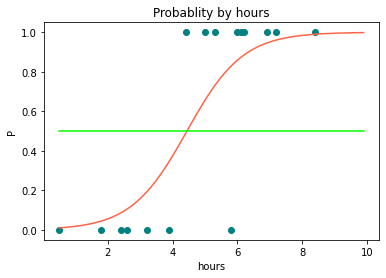

In [53]:
plt.scatter(X_train, y_train, color="teal")
plt.plot(X_range, p, color="tomato")
plt.plot(X_range, np.full(len(X_range), 0.5), color="lime")
plt.title("Probablity by hours")
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

### Data Visualization (Test Set )

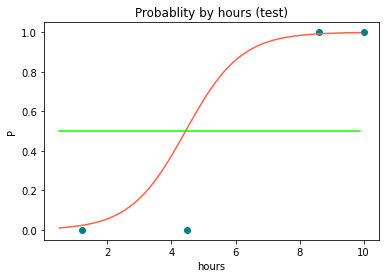

In [56]:
plt.scatter(X_test, y_test, color="teal")
plt.plot(X_range, p, color="tomato")
plt.plot(X_range, np.full(len(X_range), 0.5), color="lime")
plt.title("Probablity by hours (test)")
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

In [58]:
classifier.predict_proba([[4.5]])
# [prob of fail, pro of pass]

array([[0.48310686, 0.51689314]])

### Confusion Matrix (혼돈 행렬)

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

#True Negative(TN), False Positive(FP)
# False Negative(FN), True Positive (TP)

# [pred F / F, pred P / F]
# [pred F / P, pred P / P]

array([[1, 1],
       [0, 2]])